# Air Quality in India

## Project description
**Project Goal**

The primary goal is to identify and characterize distinct types of air pollution across monitoring stations in India (2015-2020) by grouping them based on their structural pollution profiles. This moves beyond simple $\text{AQI}$ forecasting to provide actionable insights into the root causes of air pollution, thereby enabling the development of targeted, location-specific policies.
***

**Problem Statement**

Air quality management in India often relies on blanket policies that fail to account for the heterogeneity of pollution sources across different cities and stations. A city dominated by industrial emissions ($\text{SO}_2, \text{NO}_2$) requires a fundamentally different intervention than an area dominated by traffic and construction dust ($\text{PM}_{2.5}, \text{PM}_{10}$). We aim to solve this by classifying areas based on the composition and temporal rhythm of their pollutants.
***

**Methodology: Causal Clustering Approach**

This project utilizes an unsupervised learning approach to segment stations into clusters, followed by a hybrid interpretation method for policy linkage.

***
**Expected Outcome**

The project will deliver a clear map of India showing the dominant type of pollution in each major metropolitan area. The primary output is the Policy Recommendation Matrix, which provides policymakers with the necessary information to allocate resources effectively and implement targeted, science-backed interventions to improve air quality.

### Data Description
| Feature                  | Category | Description & Unit | Role in Analysis / Impact                                                                                                                                  |
|:-------------------------| :--- | :--- |:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **City**                 | Spatial | Name of the city. | Used for **Clustering** and grouping data to identify regional patterns.                                                                                   |
| **Date**                 | Temporal | Date of measurement. Range: 2015 – 2020. | Foundation for **Time Series Analysis** and forecasting.                                                                                                   |
| **$\text{PM}_{2.5}$**    | Pollutant | Particulate matter $\le 2.5 \ \mu m$ in diameter. (Unit: $\mu g/m^3$). | **Key AQI driver.** Most hazardous to health; often dominates the $\text{AQI}$ calculation.                                                                |
| **$\text{PM}_{10}$**     | Pollutant | Particulate matter $\le 10 \ \mu m$ in diameter. (Unit: $\mu g/m^3$). | Important indicator of dust, smoke, and soot.                                                                                                              |
| **$\text{NO}$**          | Pollutant | Nitric Oxide. Initial emission product from combustion. (Unit: $\mu g/m^3$). | Highly reactive; quickly converts to the more toxic $\text{NO}_2$ in the atmosphere.                                                                       |
| **$\text{NO}_2$**        | Pollutant | Nitrogen Dioxide. (Unit: $\mu g/m^3$). | Indicator of **traffic pollution**. A **precursor to $\text{O}_3$**.                                                                                       |
| **$\text{NO}_x$**        | Pollutant | Total Nitrogen Oxides ($\text{NO} + \text{NO}_2$). (Unit: $\mu g/m^3$). | Represents the total pollution load. Highly correlated with $\text{NO}$ and $\text{NO}_2$ (multicollinearity risk).                                        |
| **$\text{SO}_2$**        | Pollutant | Sulfur Dioxide. (Unit: $\mu g/m^3$). | Indicator of **industrial pollution** and coal burning.                                                                                                    |
| **$\text{CO}$**          | Pollutant | Carbon Monoxide. (Unit: $\text{mg/m}^3$). | **Acute hazard** (poisonous gas). High values sharply increase $\text{AQI}$.                                                                               |
| **$\text{O}_3$**         | Pollutant | Ground-level Ozone (secondary pollutant). (Unit: $\mu g/m^3$). | **"Summer" pollutant**, formed by solar activity.                                                                                                          |
| **$\text{NH}_3$**        | Pollutant | Ammonia. (Unit: $\mu g/m^3$). | Linked to **agriculture**. Contributes to the formation of secondary **$\text{PM}_{2.5}$**.                                                                |
| **$\text{Benzene}$**     | Pollutant | Volatile Organic Compound ($\text{VOC}$). (Unit: $\mu g/m^3$). | **Toxic and carcinogenic** component.                                                                                                                      |
| **$\text{Toluene}$**     | Pollutant | Volatile Organic Compound ($\text{VOC}$). (Unit: $\mu g/m^3$). | Toxic component.                                                                                                                                           |
| **$\text{Xylene}$**      | Pollutant | Volatile Organic Compound ($\text{VOC}$). (Unit: $\mu g/m^3$). | Toxic component.                                                                                                                                           |
| **$\text{AQI}$**         | **Target** | Air Quality Index (Scale 0–500+). | **Target variable** for regression (forecasting).                                                                                                          |
| **$\text{AQI\_Bucket}$** | Category | Categorical description of $\text{AQI}$ (e.g., "Good", "Severe"). | **Target variable** for classification. Severe-Very poor-Poor-Satisfactory-Moderate-Good                                                                   |

In [57]:
!pip install -q kagglehub[pandas-datasets]
!pip install -q missingno
!pip install -q tabulate


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import kagglehub
import pandas as pd
import missingno as msno
import seaborn as sns
import phik
import matplotlib.pyplot as plt
import numpy as np
import tabulate

In [23]:
city_day = pd.read_csv("C:\\Users\\ASUS\\Downloads\\city_day.csv")
city_hour = pd.read_csv("C:\\Users\\ASUS\\Downloads\\city_hour.csv")
station_day = pd.read_csv("C:\\Users\\ASUS\\Downloads\\station_day.csv")
station_hour = pd.read_csv("C:\\Users\\ASUS\\Downloads\\station_hour.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32892\2839234200.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv("C:\\Users\\ASUS\\Downloads\\station_hour.csv")


In [24]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [31]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [27]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [40]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


Text(0.5, 1.0, 'Matrix for missing values')

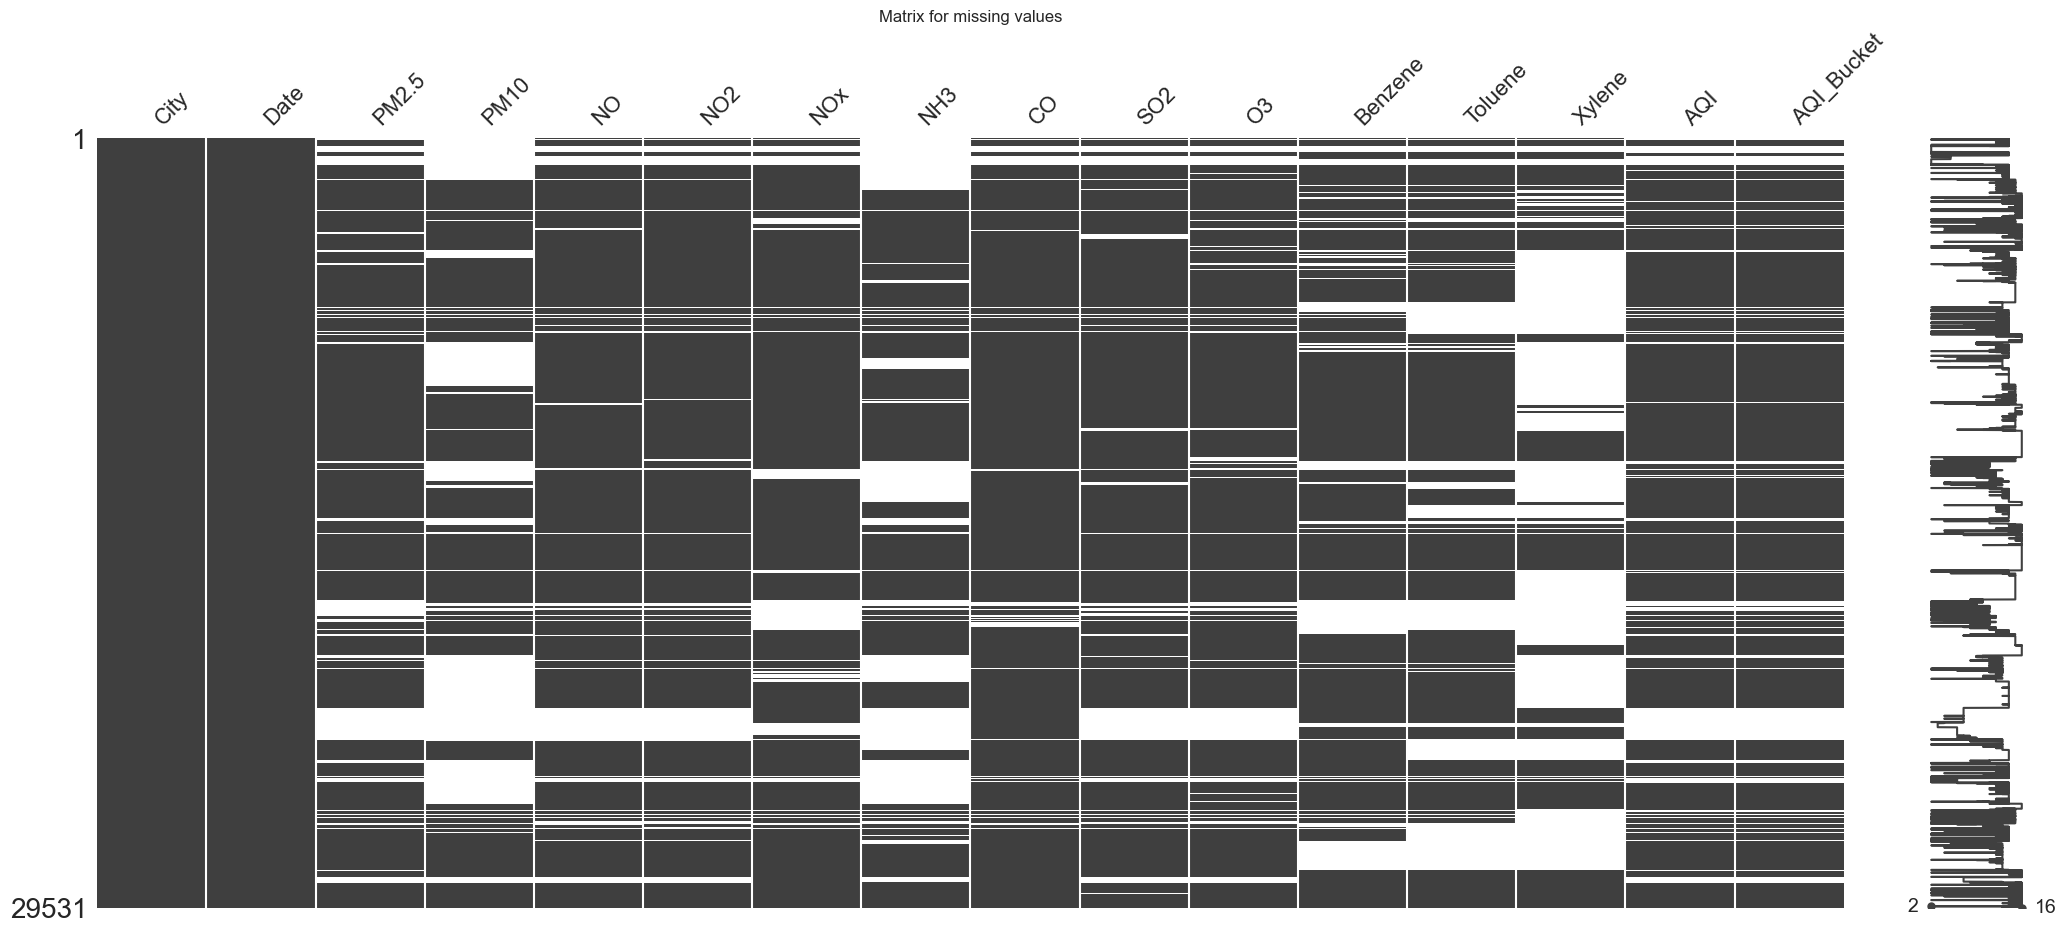

In [45]:
msno.matrix(city_day)
plt.title('Matrix for missing values')

**There is a serious problem with missing values> The critical number of missing values is especially the case for Xylene**

In [37]:
city_hour['AQI_Bucket'].unique()

array([nan, 'Poor', 'Moderate', 'Very Poor', 'Severe', 'Satisfactory',
       'Good'], dtype=object)

In [25]:
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [28]:
city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [46]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_hour)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,455829,64.400000
PM10,296737,41.900000
NH3,272542,38.500000
Toluene,220607,31.200000
Benzene,163646,23.100000
PM2.5,145088,20.500000
SO2,130373,18.400000
O3,129208,18.300000
AQI_Bucket,129080,18.200000
AQI,129080,18.200000


In [47]:
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [48]:
station_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [50]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(station_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,85137,78.800000
NH3,48105,44.500000
PM10,42706,39.500000
Toluene,38702,35.800000
Benzene,31455,29.100000
O3,25568,23.700000
SO2,25204,23.300000
PM2.5,21625,20.000000
AQI_Bucket,21010,19.400000
AQI,21010,19.400000


In [51]:
station_hour.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [52]:
station_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [53]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(station_hour)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,2075104,80.100000
NH3,1236618,47.800000
PM10,1119252,43.200000
Toluene,1042366,40.300000
Benzene,861579,33.300000
SO2,742737,28.700000
O3,725973,28.000000
PM2.5,647689,25.000000
AQI_Bucket,570190,22.000000
AQI,570190,22.000000


In [55]:
def create_all_missing_values_table(df_list_and_names):
    results = []

    for df, name in df_list_and_names:
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_df = mis_val_percent.reset_index()
        mis_val_df.columns = ['Feature', name]

        mis_val_df = mis_val_df[mis_val_df[name] > 0]

        mis_val_df = mis_val_df.set_index('Feature')
        results.append(mis_val_df)

    final_table = pd.concat(results, axis=1)

    final_table = final_table.fillna(0.0)

    final_table['Total_Missing_Avg'] = final_table.sum(axis=1) / len(df_list_and_names)
    final_table = final_table.sort_values(by='Total_Missing_Avg', ascending=False)
    final_table = final_table.drop(columns=['Total_Missing_Avg'])

    final_table = final_table.round(1)

    return final_table

In [60]:
def get_missing_percentage_for_plot(df, df_name):
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_df = mis_val_percent.reset_index()
    mis_val_df.columns = ['Feature', 'Missing_Percentage']
    mis_val_df['Dataset'] = df_name
    mis_val_df = mis_val_df[mis_val_df['Missing_Percentage'] > 0]
    return mis_val_df

In [61]:
datasets_to_process = [
    (city_day, 'city_day'),
    (city_hour, 'city_hour'),
    (station_day, 'station_day'),
    (station_hour, 'station_hour')
]
all_missing_data = pd.concat([
    get_missing_percentage_for_plot(df, name) for df, name in datasets_to_process
], ignore_index=True)

In [63]:
heatmap_data = all_missing_data.pivot_table(
    index='Feature',
    columns='Dataset',
    values='Missing_Percentage'
).fillna(0.0).round(1)

In [64]:
heatmap_data['Total_Missing_Avg'] = heatmap_data.sum(axis=1) / len(datasets_to_process)
heatmap_data = heatmap_data.sort_values(by='Total_Missing_Avg', ascending=False).drop(columns=['Total_Missing_Avg'])

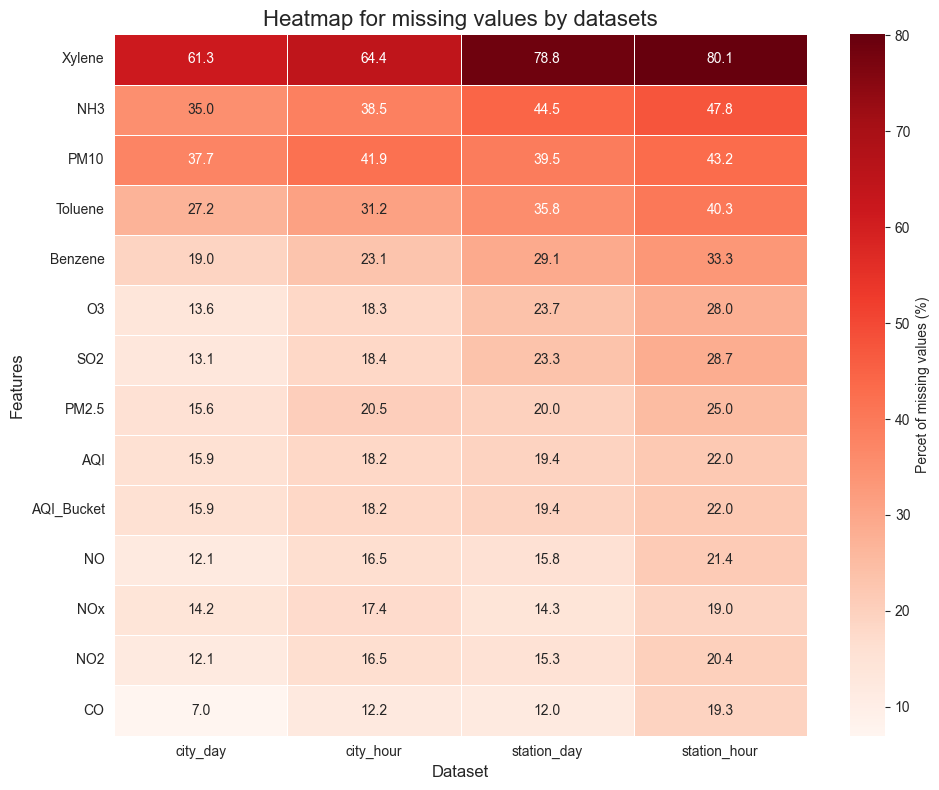

In [67]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    heatmap_data,
    annot=True,               # Отображение значений (%) внутри ячеек
    fmt=".1f",                # Формат значений (один знак после запятой)
    cmap="Reds",              # Цветовая схема: более темный красный = больше пропусков
    linewidths=.5,            # Разделительные линии
    cbar_kws={'label': 'Percet of missing values (%)'} # Подпись цветовой шкалы
)

plt.title('Heatmap for missing values by datasets', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
plt.yticks(rotation=0) # Горизонтальное расположение меток признаков
plt.tight_layout()
plt.savefig('missing_values_heatmap_comparison.png')
plt.show()

***
- Hourly data has greate percetage of missing values for each variable
- In general the missing values for data by stations is greater
**Despite the fact that `station_hour` dataset contains the greatest number of missing values, but meanwhile the greatest number of observatios, for our project this detaile data suits the aim of our project the best.**

We choose:
- **station-level** data for geaographical reasons, as its depicts local picture of pollution
- **hour-level** data since it is important for melling purpouses, and allows more flexible aggregation, but we should pay attention to fact that hourly data is sesetive to noise
***

## Station-hour data missing values imputation

In [69]:
station_hour.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [70]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(station_hour)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,2075104,80.100000
NH3,1236618,47.800000
PM10,1119252,43.200000
Toluene,1042366,40.300000
Benzene,861579,33.300000
SO2,742737,28.700000
O3,725973,28.000000
PM2.5,647689,25.000000
AQI_Bucket,570190,22.000000
AQI,570190,22.000000
